In [1]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import random
import os

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
path = "gdrive/My Drive/Master Computer Science/Programming for Advanced AI"

Mounted at /content/gdrive


In [3]:
print(os.path.isdir(path))
print(os.path.isdir(path + "/Dataset"))

True
True


In [18]:
# Define the path to the zip file and the destination directory
zip_file_path = "/content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-test-dev.zip"
destination_dir = "/content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-test-dev/"

# Unzip the file using a shell command
!unzip "{zip_file_path}" -d "{destination_dir}"


Archive:  /content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-test-dev.zip
   creating: /content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-test-dev/annotations/
  inflating: /content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-test-dev/annotations/0000006_00159_d_0000001.txt  
  inflating: /content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-test-dev/annotations/0000006_00611_d_0000002.txt  
  inflating: /content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-test-dev/annotations/0000006_01111_d_0000003.txt  
  inflating: /content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-test-dev/annotations/0000006_01275_d_0000004.txt  
  inflating: /content/gdrive/MyDrive/Master Computer Science/Programming for Adv

In [20]:
print(os.path.isdir("/content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-test-dev/images/"))
print(os.path.isdir("/content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-test-dev/annotations/"))

True
True


In [21]:
# Define the path to the zip file and the destination directory
zip_file_path = "/content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-train.zip"
destination_dir = "/content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-train/"

# Unzip the file using a shell command
!unzip "{zip_file_path}" -d "{destination_dir}"


Streaming output truncated to the last 5000 lines.
 extracting: /content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-train/VisDrone2019-DET-train/images/9999937_00000_d_0000140.jpg  
 extracting: /content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-train/VisDrone2019-DET-train/images/9999937_00000_d_0000141.jpg  
 extracting: /content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-train/VisDrone2019-DET-train/images/9999937_00000_d_0000142.jpg  
 extracting: /content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-train/VisDrone2019-DET-train/images/9999937_00000_d_0000143.jpg  
 extracting: /content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-train/VisDrone2019-DET-train/images/9999937_00000_d_0000144.jpg  
  inflating: /content/gdrive/MyDrive/Master Compu

In [23]:
print(os.path.isdir("/content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-train/VisDrone2019-DET-train/images/"))
print(os.path.isdir("/content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-train/VisDrone2019-DET-train/annotations/"))

True
True


In [24]:
# Define the path to the zip file and the destination directory
zip_file_path = "/content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-val.zip"
destination_dir = "/content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-val/"

# Unzip the file using a shell command
!unzip "{zip_file_path}" -d "{destination_dir}"


Archive:  /content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-val.zip
   creating: /content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-val/VisDrone2019-DET-val/
  inflating: /content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-val/VisDrone2019-DET-val/.DS_Store  
   creating: /content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-val/VisDrone2019-DET-val/annotations/
  inflating: /content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-val/VisDrone2019-DET-val/annotations/0000001_02999_d_0000005.txt  
  inflating: /content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-val/VisDrone2019-DET-val/annotations/0000001_03499_d_0000006.txt  
  inflating: /content/gdrive/MyDrive/Master Computer Science/Programming for

In [27]:
print(os.path.isdir("/content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-val/VisDrone2019-DET-val/images/"))
print(os.path.isdir("/content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-val/VisDrone2019-DET-val/annotations/"))

True
True


In [28]:
def get_subfiles(dir):
    return next(os.walk(dir))[2]

In [29]:
image_train_path = "/content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-train/VisDrone2019-DET-train/images/"

In [30]:
names_img_train = get_subfiles(image_train_path)
print("Number of Images:", len(names_img_train))

Number of Images: 6471


In [31]:
class_names_dict = {
    0: 'pedestrian',
    1: 'people',
    2: 'bicycle',
    3: 'car',
    4: 'van',
    5: 'truck',
    6: 'tricycle',
    7: 'awning-tricycle',
    8: 'bus',
    9: 'motor'
}

**Plot a random image**

In [34]:
train_path = "/content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-train/VisDrone2019-DET-train/"

Random image ID:  1732


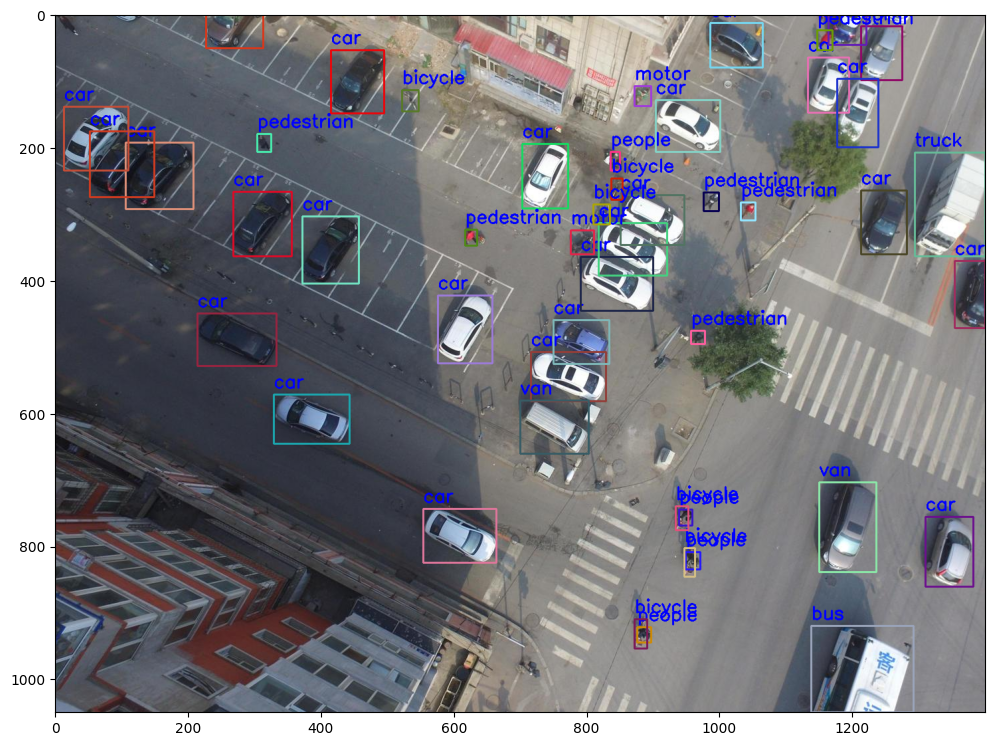

In [35]:
random_img_id = np.random.choice(len(names_img_train),1)
print('Random image ID: ', random_img_id[0])

random_img = cv2.imread(image_train_path + names_img_train[random_img_id[0]])
random_file_path = train_path + "annotations/" + names_img_train[random_img_id[0]].split('.')[0] + '.txt'

with open(random_file_path, 'r') as file:
    random_annotation = file.readlines()

# Loop over each line in the annotations file
for line in random_annotation:
    parts = line.strip().split(',')

    x, y, width, height, label_id = int(parts[0]), int(parts[1]), int(parts[2]), int(parts[3]), int(parts[5]) - 1

    label = class_names_dict.get(label_id)
    # print(label)
    # Generate a random color for the bounding box
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    # Draw the bounding box
    cv2.rectangle(random_img, (x, y), (x + width, y + height), color, 2)
    # Put the label near the bounding box
    cv2.putText(random_img, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
plt.figure(figsize=(12,12))
plt.imshow(cv2.cvtColor(random_img, cv2.COLOR_BGR2RGB))

In [36]:
def create_df(image_folder, annotation_folder, class_name_dict):
  # List to store dataframe rows
  data = []
  # Process each annotation file
  for annotation_file in os.listdir(annotation_folder):
    if annotation_file.endswith('.txt'):
        image_file = annotation_file.replace('.txt', '.jpg')
        image_path = os.path.join(image_folder, image_file)
        # print(image_path)
        annotation_path = os.path.join(annotation_folder, annotation_file)
        # print(annotation_path)
        with open(annotation_path, 'r') as f:
            for line in f:
                parts = line.strip().split(',')
                x_min = int(parts[0])
                y_min = int(parts[1])
                width = int(parts[2])
                height = int(parts[3])
                class_idx = int(parts[5]) - 1  # Convert 1-based index to 0-based index
                x_max = x_min + width
                y_max = y_min + height
                # class_name = class_names[class_idx]
                class_name = class_name_dict.get(class_idx)
                if(class_name != None):
                  data.append([image_path, x_min, y_min, x_max, y_max, class_name])
  return pd.DataFrame(data, columns=['filepath', 'x1', 'y1', 'x2', 'y2', 'class_name'])

In [37]:
# Path train
image_train_folder = "/content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-train/VisDrone2019-DET-train/images/"
annotation_train_folder = "/content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-train/VisDrone2019-DET-train/annotations/"


In [38]:
df_train = create_df(image_train_folder, annotation_train_folder, class_names_dict)

In [39]:
df_train

,filepath,x1,y1,x2,y2,class_name
0,/content/gdrive/MyDrive/Master Computer Scienc...,708,471,782,504,car
1,/content/gdrive/MyDrive/Master Computer Scienc...,639,425,700,471,car
2,/content/gdrive/MyDrive/Master Computer Scienc...,594,399,658,450,car
3,/content/gdrive/MyDrive/Master Computer Scienc...,562,390,623,428,car
4,/content/gdrive/MyDrive/Master Computer Scienc...,540,372,605,405,car
...,...,...,...,...,...,...
343200,/content/gdrive/MyDrive/Master Computer Scienc...,1301,840,1305,849,pedestrian
343201,/content/gdrive/MyDrive/Master Computer Scienc...,1321,779,1342,802,truck
343202,/content/gdrive/MyDrive/Master Computer Scienc...,1319,770,1331,782,van
343203,/content/gdrive/MyDrive/Master Computer Scienc...,1333,766,1343,774,van


In [40]:
df_train['class_name'].value_counts()

class_name
car                144867
pedestrian          79337
motor               29647
people              27059
van                 24956
truck               12875
bicycle             10480
bus                  5926
tricycle             4812
awning-tricycle      3246
Name: count, dtype: int64

In [41]:
# Path valid
image_val_folder = "/content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-val/VisDrone2019-DET-val/images/"
annotation_val_folder = "/content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-val/VisDrone2019-DET-val/annotations/"

In [42]:
df_val = create_df(image_val_folder, annotation_val_folder, class_names_dict)

In [43]:
df_val['class_name'].value_counts()

class_name
car                14064
pedestrian          8844
people              5125
motor               4886
van                 1975
bicycle             1287
tricycle            1045
truck                750
awning-tricycle      532
bus                  251
Name: count, dtype: int64

In [44]:
# Path test
image_test_folder = "/content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-test-dev/images/"
annotation_test_folder = "/content/gdrive/MyDrive/Master Computer Science/Programming for Advanced AI/Dataset/VisDrone2019-DET-test-dev/annotations/"

In [45]:
df_test = create_df(image_test_folder, annotation_test_folder, class_names_dict)

In [46]:
df_test['class_name'].value_counts()

class_name
car                28074
pedestrian         21006
people              6376
motor               5845
van                 5771
bus                 2940
truck               2659
bicycle             1302
awning-tricycle      599
tricycle             530
Name: count, dtype: int64